In [89]:
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [90]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [91]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [92]:
df[['SYSTOLIC','DTASTOLIC' ]]=df['Blood Pressure'].str.split('/',expand=True)
df.drop(['Blood Pressure'],axis=1, inplace=True)

In [93]:
df1 = df.copy()

In [94]:
df1.drop(['Sleep Disorder'], axis=1, inplace=True)

In [95]:
df1

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,SYSTOLIC,DTASTOLIC
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,140,95


In [96]:
df1['Sleep Disorder'] = df['Sleep Disorder']

[Text(0.5, 1.0, 'Gender VS Sleep Disorders')]

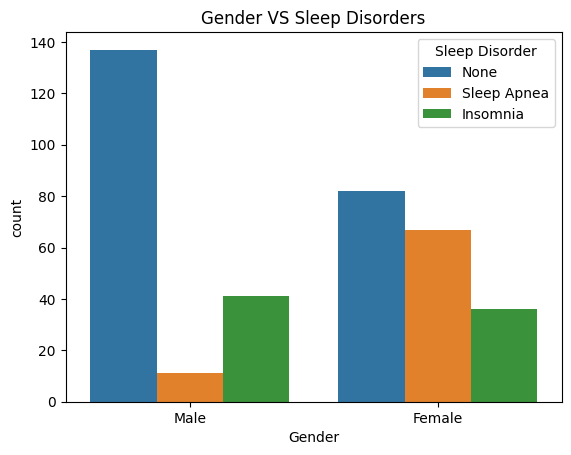

In [97]:
sns.countplot(x='Gender', data=df1, hue='Sleep Disorder').set(title='Gender VS Sleep Disorders')

In [98]:
df['SYSTOLIC'] = df['SYSTOLIC'].astype(float)
df['DTASTOLIC'] = df['DTASTOLIC'].astype(float)
df1['SYSTOLIC'] = df1['SYSTOLIC'].astype(float)
df1['DTASTOLIC'] = df1['DTASTOLIC'].astype(float)

In [99]:
df.isna().sum()
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
SYSTOLIC                   float64
DTASTOLIC                  float64
dtype: object

In [100]:
df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [101]:
df['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [102]:
label = LabelEncoder()
df1['Occupation'] = label.fit_transform(df1['Occupation'])
df1['BMI Category'] = label.fit_transform(df1['BMI Category'])
df['Sleep Disorder'] = label.fit_transform(df['Sleep Disorder'])
df1['Gender'] = label.fit_transform(df1['Gender'])
df1

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,SYSTOLIC,DTASTOLIC,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,3,77,4200,126.0,83.0,None
1,2,1,28,1,6.2,6,60,8,0,75,10000,125.0,80.0,None
2,3,1,28,1,6.2,6,60,8,0,75,10000,125.0,80.0,None
3,4,1,28,6,5.9,4,30,8,2,85,3000,140.0,90.0,Sleep Apnea
4,5,1,28,6,5.9,4,30,8,2,85,3000,140.0,90.0,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,5,8.1,9,75,3,3,68,7000,140.0,95.0,Sleep Apnea
370,371,0,59,5,8.0,9,75,3,3,68,7000,140.0,95.0,Sleep Apnea
371,372,0,59,5,8.1,9,75,3,3,68,7000,140.0,95.0,Sleep Apnea
372,373,0,59,5,8.1,9,75,3,3,68,7000,140.0,95.0,Sleep Apnea


In [103]:
X = df1.iloc[:,1:-1]
y = df1.iloc[:,-1]

In [104]:
overSample = SMOTE(random_state=1)
X,y = overSample.fit_resample(X,y) 

[Text(0.5, 1.0, 'Sleep Duration VS Quality of Sleep')]

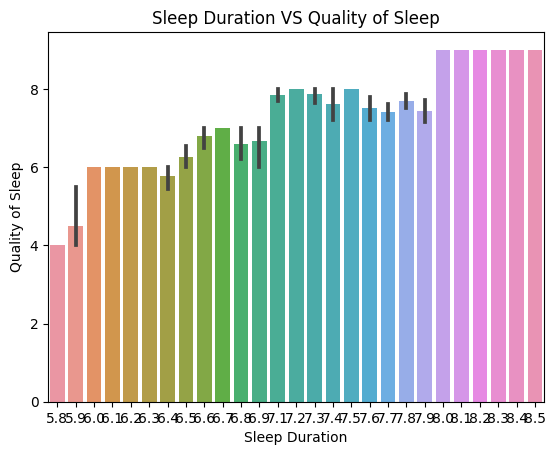

In [105]:
sns.barplot(x='Sleep Duration', y='Quality of Sleep', data=df1).set(title='Sleep Duration VS Quality of Sleep')

[Text(0.5, 1.0, 'Stress Level VS Quality of Sleep')]

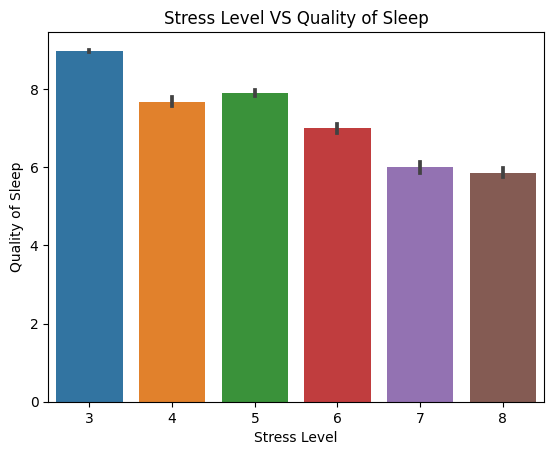

In [106]:
sns.barplot(x='Stress Level', y='Quality of Sleep', data=df1).set(title='Stress Level VS Quality of Sleep')


In [107]:
mm = MinMaxScaler()
X = mm.fit_transform(X)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1) 

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Insomnia       0.88      0.89      0.88        63
        None       0.83      0.86      0.85        58
 Sleep Apnea       0.93      0.90      0.91        77

    accuracy                           0.88       198
   macro avg       0.88      0.88      0.88       198
weighted avg       0.89      0.88      0.88       198



In [110]:
from sklearn.svm import SVC

In [111]:
sv = SVC()
sv.fit(X_train, y_train)
y_pred1 = sv.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

    Insomnia       0.87      0.87      0.87        63
        None       0.82      0.86      0.84        58
 Sleep Apnea       0.92      0.88      0.90        77

    accuracy                           0.87       198
   macro avg       0.87      0.87      0.87       198
weighted avg       0.88      0.87      0.87       198



In [112]:
from sklearn.model_selection import GridSearchCV
sv = SVC()
params = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001], 'kernel':['rbf','ploy','sigmoid']}
clf = GridSearchCV(sv,params,cv=5,scoring='accuracy')
clf.fit(X_train,y_train)
clf.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [113]:
sv = SVC(C=100, kernel='poly', gamma=1)
sv.fit(X_train,y_train)
y_pred1 = sv.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

    Insomnia       0.92      0.89      0.90        63
        None       0.88      0.90      0.89        58
 Sleep Apnea       0.92      0.94      0.93        77

    accuracy                           0.91       198
   macro avg       0.91      0.91      0.91       198
weighted avg       0.91      0.91      0.91       198



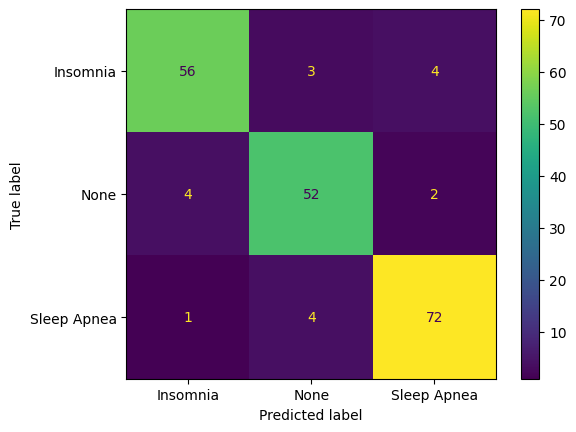

In [114]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred1))

In [115]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred2 = nb.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

    Insomnia       0.80      0.89      0.84        63
        None       0.82      0.86      0.84        58
 Sleep Apnea       0.94      0.82      0.88        77

    accuracy                           0.85       198
   macro avg       0.85      0.86      0.85       198
weighted avg       0.86      0.85      0.85       198



In [116]:
from math import sqrt
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [117]:
rf = RandomForestClassifier()
params1 = {'n_estimators':[25,50,100,150], 'max_features':['sqrt','auto'], 'max_depth':[2,4], 'min_samples_split':[2,5], 'min_samples_leaf':[1,2]}
clf = GridSearchCV(rf, params1, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_

{'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 25}

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.4, max_depth=8, random_state=1)
gb.fit(X_train,y_train)
y_pred5 = gb.predict(X_test)
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

    Insomnia       0.92      0.89      0.90        63
        None       0.87      0.93      0.90        58
 Sleep Apnea       0.93      0.91      0.92        77

    accuracy                           0.91       198
   macro avg       0.91      0.91      0.91       198
weighted avg       0.91      0.91      0.91       198



In [119]:
y_pred1 = sv.predict([[1,27,9,6.1,6,42,6,3,77,4200,126.0,83.0]])
y_pred1

array(['None'], dtype=object)